In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Load data from the first worksheet
data_2020 = pd.read_excel(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\Agro products_ 2018 to 2022.xlsx", sheet_name='2020 ')
data_2020['Sail Date.'] = pd.to_datetime(data_2020['Sail Date.']).dt.date
data_2020

,Sail Date.,QTY.(KGS)
0,2020-01-01,17000
1,2020-01-01,15000
2,2020-01-01,10767
3,2020-01-01,18000
4,2020-01-01,15000
...,...,...
7001,2020-10-31,5238
7002,2020-10-31,41480
7003,2020-10-31,9845
7004,2020-10-31,11750


In [6]:
data_2020.shape

(7006, 2)

In [7]:
if pd.api.types.is_datetime64_any_dtype(data_2020['Sail Date.']):
    # Sort the DataFrame based on the 'Sail Date' column
     data_2020.sort_values(by='Sail Date.')
data_2020

,Sail Date.,QTY.(KGS)
0,2020-01-01,17000
1,2020-01-01,15000
2,2020-01-01,10767
3,2020-01-01,18000
4,2020-01-01,15000
...,...,...
7001,2020-10-31,5238
7002,2020-10-31,41480
7003,2020-10-31,9845
7004,2020-10-31,11750


In [8]:
data_2020['Sail Date.'] = pd.to_datetime(data_2020['Sail Date.'])

g=data_2020.sort_values(by="Sail Date.")

In [9]:
g.to_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_20.csv', index=False)

In [10]:
# Assuming data_2020 is your DataFrame containing the sales data
# Assuming 'Sail Date.' column contains datetime values

# Convert 'Sail Date.' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data_2020['Sail Date.']):
    data_2020['Sail Date.'] = pd.to_datetime(data_2020['Sail Date.'], errors='coerce')

# Filter the DataFrame for November and December of 2020
nov_dec_2020_data = data_2020[(data_2020['Sail Date.'].dt.year == 2020) & 
                                ((data_2020['Sail Date.'].dt.month == 11) | 
                                 (data_2020['Sail Date.'].dt.month == 12))]

# Print the filtered data
print("Data for November and December 2020:")
print(nov_dec_2020_data)


Data for November and December 2020:
     Sail Date.  QTY.(KGS)
2292 2020-11-02      28340
2293 2020-11-02       8842
2294 2020-11-02      23442
2295 2020-11-02       9200
2296 2020-11-02      15000
...         ...        ...
6843 2020-12-30      25080
6844 2020-12-30      15876
6845 2020-12-30      15876
6846 2020-12-30      27516
6847 2020-12-30       6555

[1220 rows x 2 columns]


In [11]:
data_2020['Sail Date.'] = pd.to_datetime(data_2020['Sail Date.'])

# Group by 'Sail Date' and sum the 'QTY.(KGS)' column
daily_sales= data_2020.groupby(data_2020['Sail Date.'].dt.date)['QTY.(KGS)'].sum().reset_index()

# Display the resulting table
print(daily_sales)

     Sail Date.  QTY.(KGS)
0    2020-01-01    1284272
1    2020-01-04     110652
2    2020-01-06      60000
3    2020-01-07    1308975
4    2020-01-09    1073901
..          ...        ...
247  2020-12-24     606878
248  2020-12-25     959254
249  2020-12-26    1433966
250  2020-12-28    3430383
251  2020-12-30     134188

[252 rows x 2 columns]


In [12]:
daily_sales.to_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_20.csv', index=False)

In [13]:
max_value = daily_sales['QTY.(KGS)'].max()

print("Maximum value in 'QTY.(KGS)':", max_value)

min_value = daily_sales['QTY.(KGS)'].min()

print("Minimum value in 'QTY.(KGS)':", min_value)

ghh= max_value - min_value
print(ghh," is the difference")

Maximum value in 'QTY.(KGS)': 3791522
Minimum value in 'QTY.(KGS)': 12479
3779043  is the difference


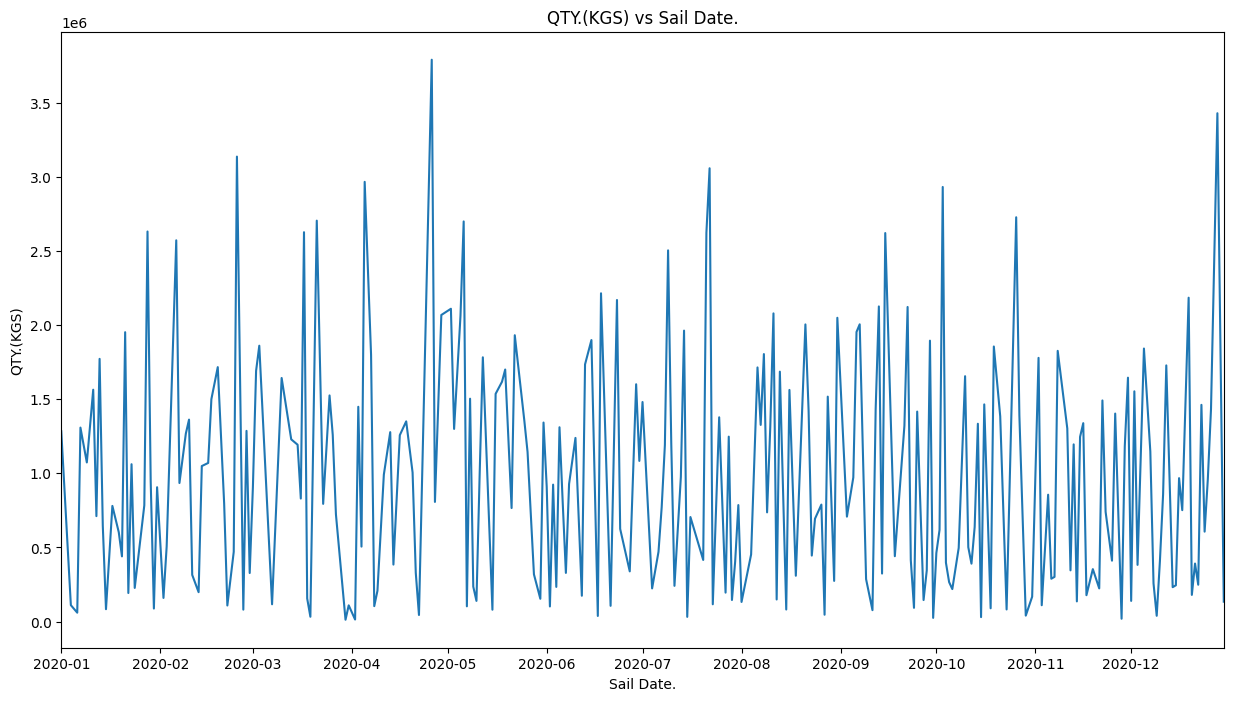

In [14]:

plt.figure(figsize=(15,8))
plt.plot(daily_sales['Sail Date.'], daily_sales['QTY.(KGS)'])
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date.')
plt.xlim(daily_sales['Sail Date.'].min(), daily_sales['Sail Date.'].max())
plt.show()

In [15]:
duplicate_rows = data_2020[data_2020.duplicated()]

# Display the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 1044


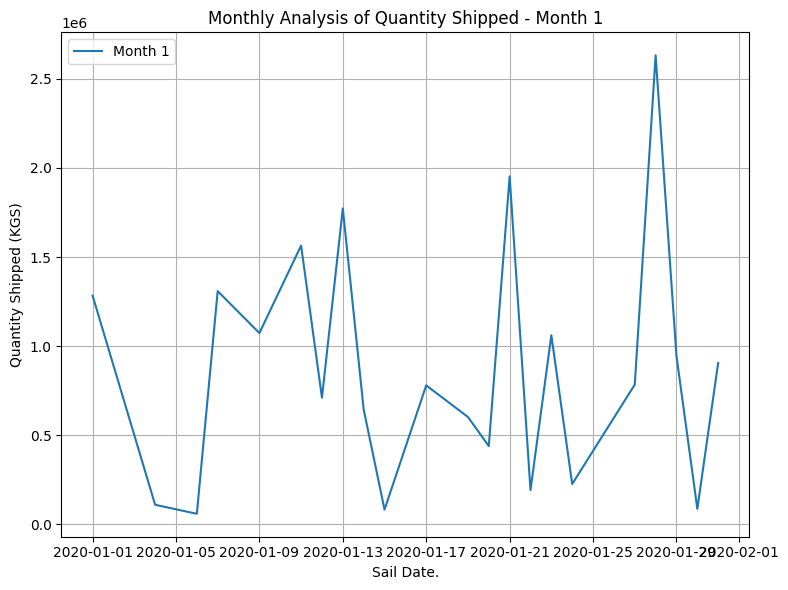

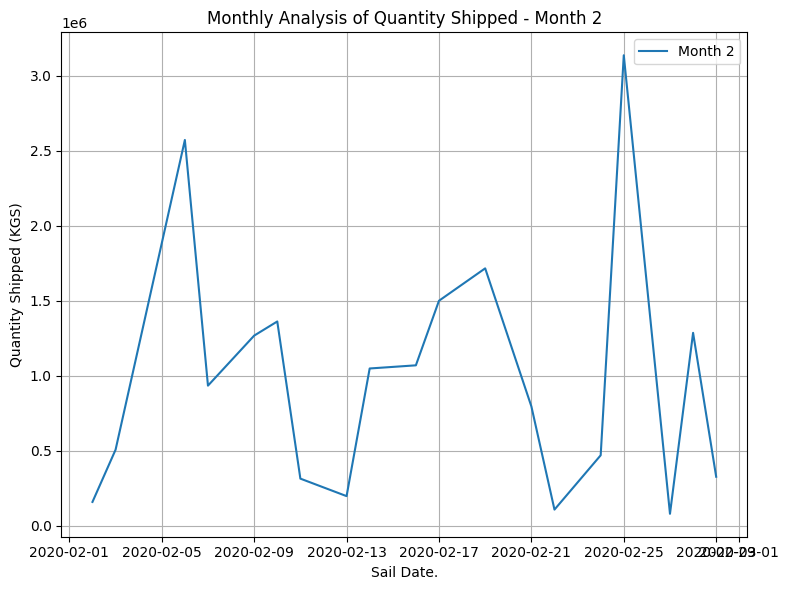

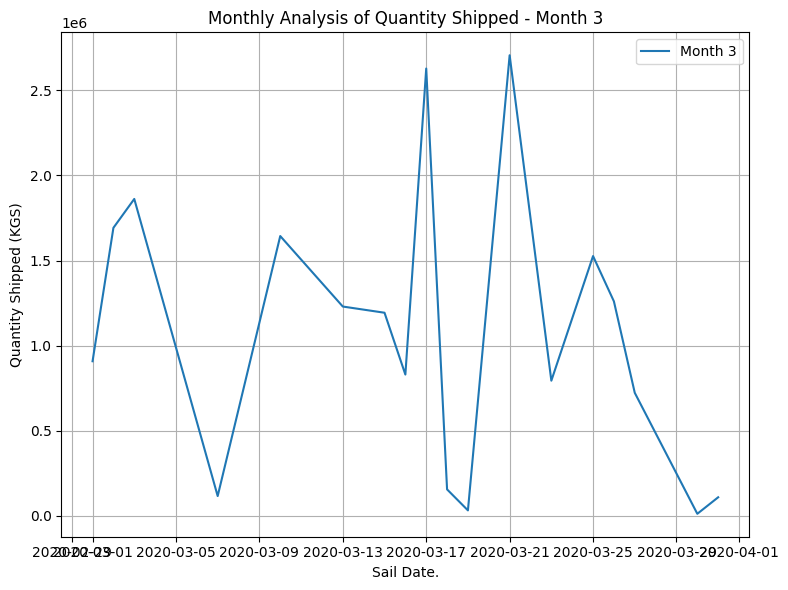

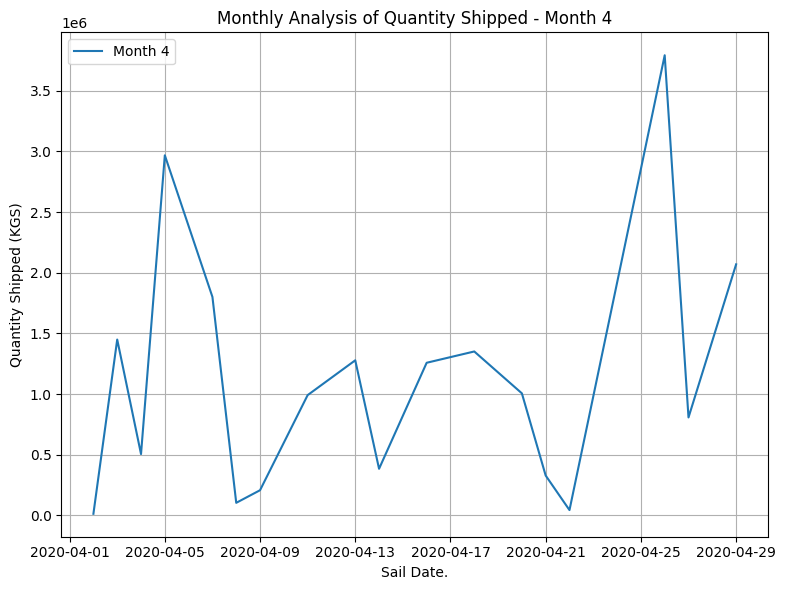

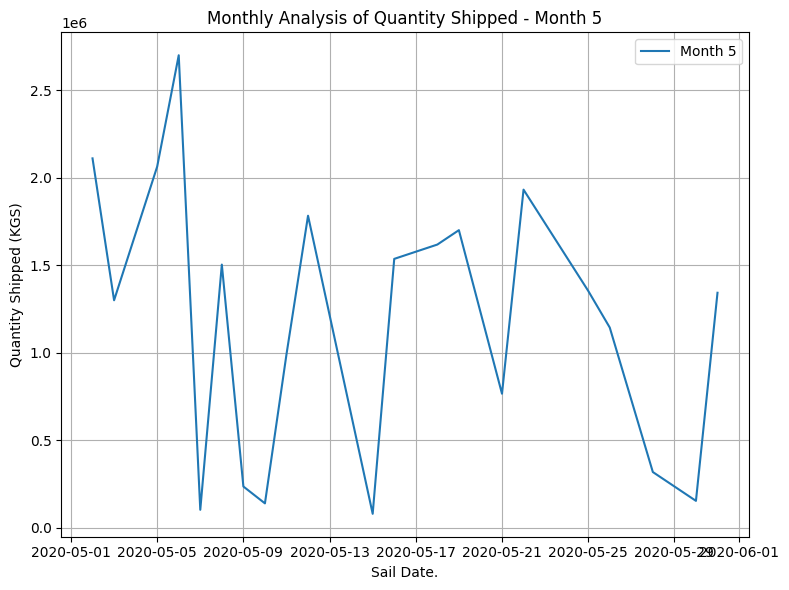

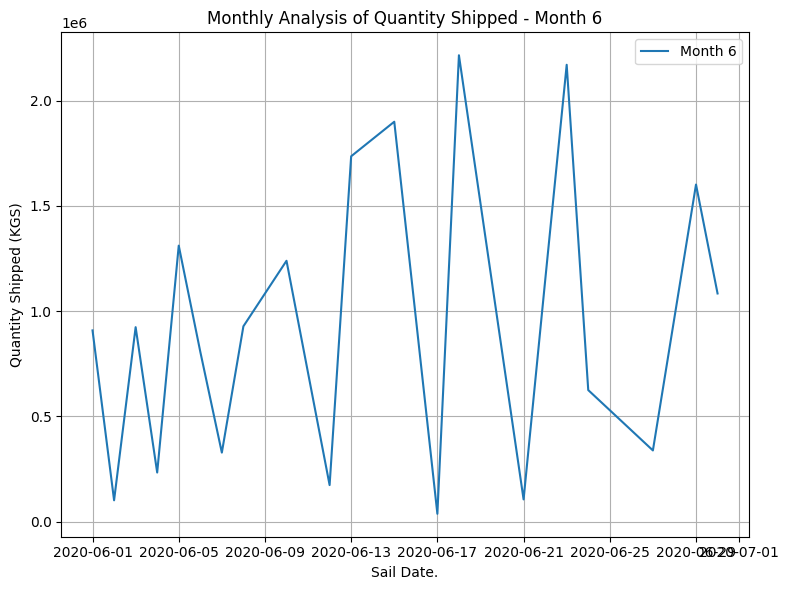

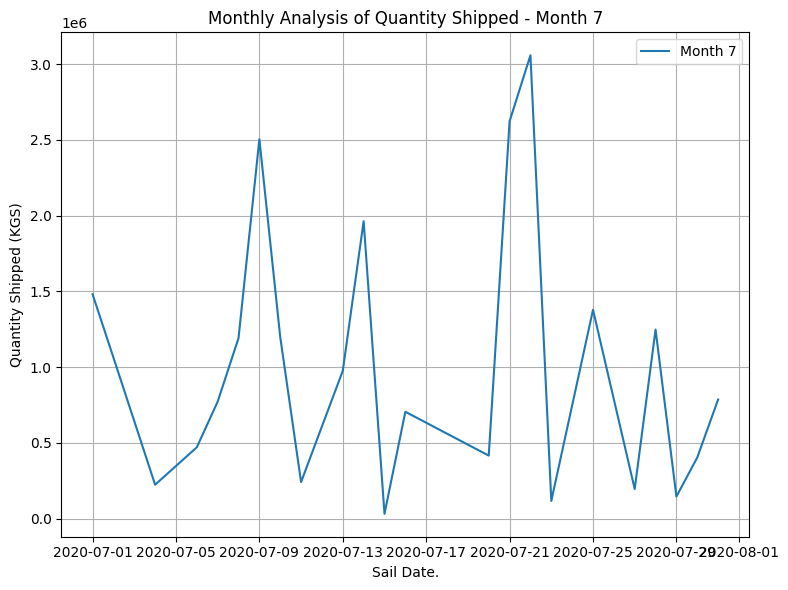

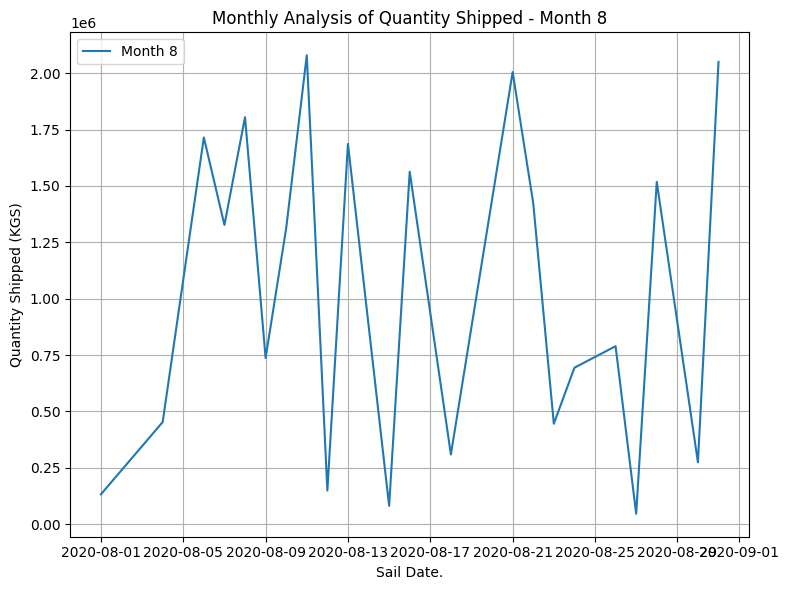

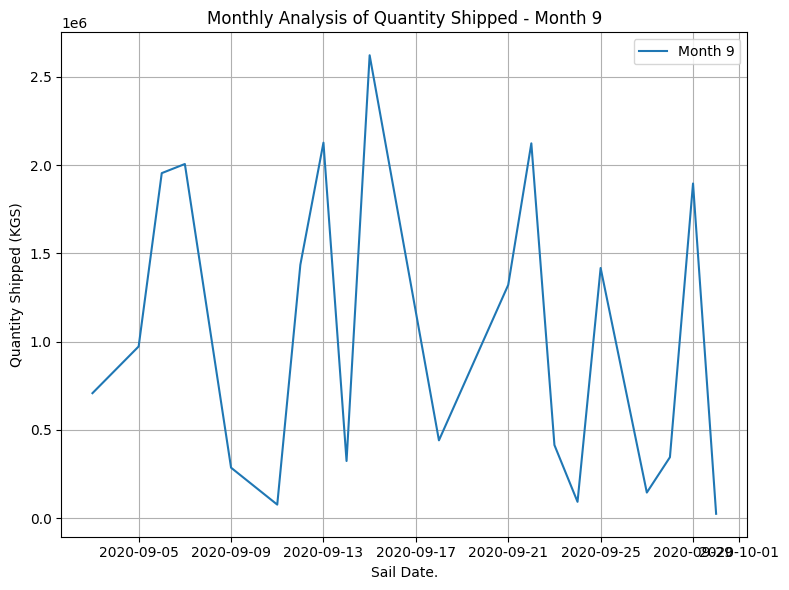

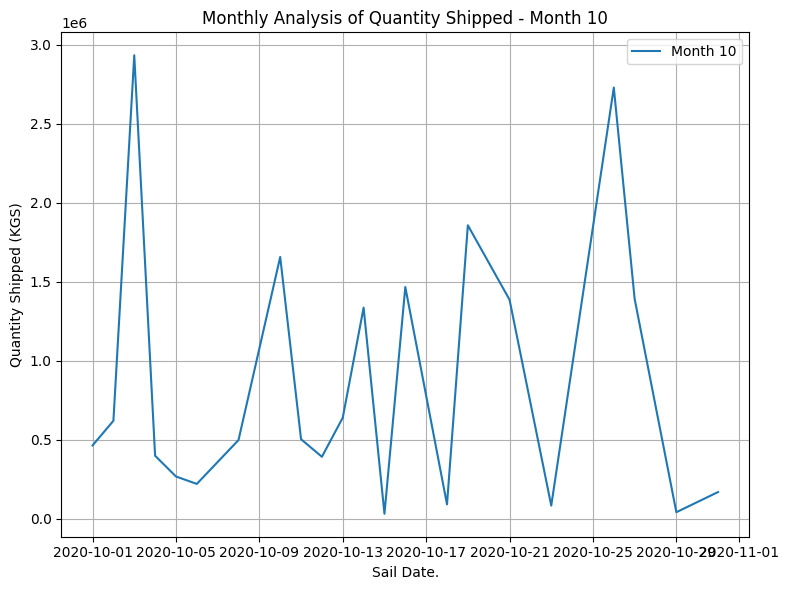

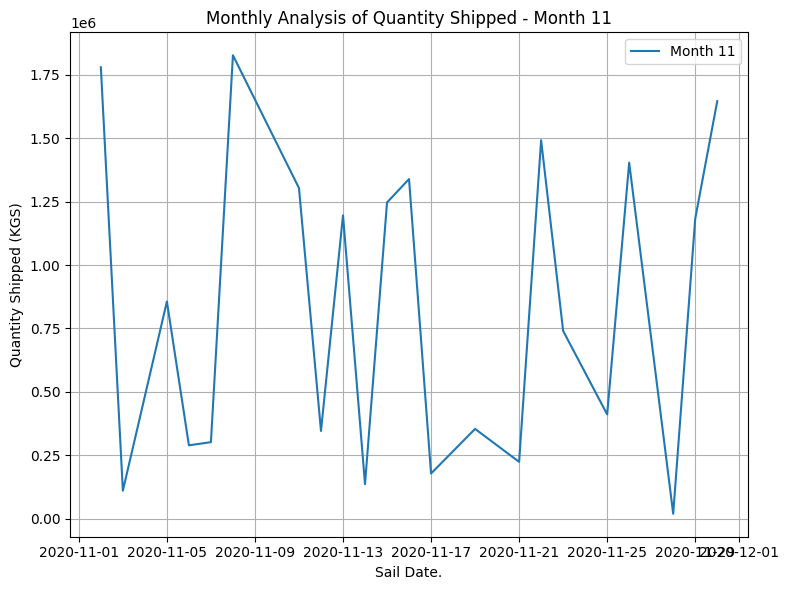

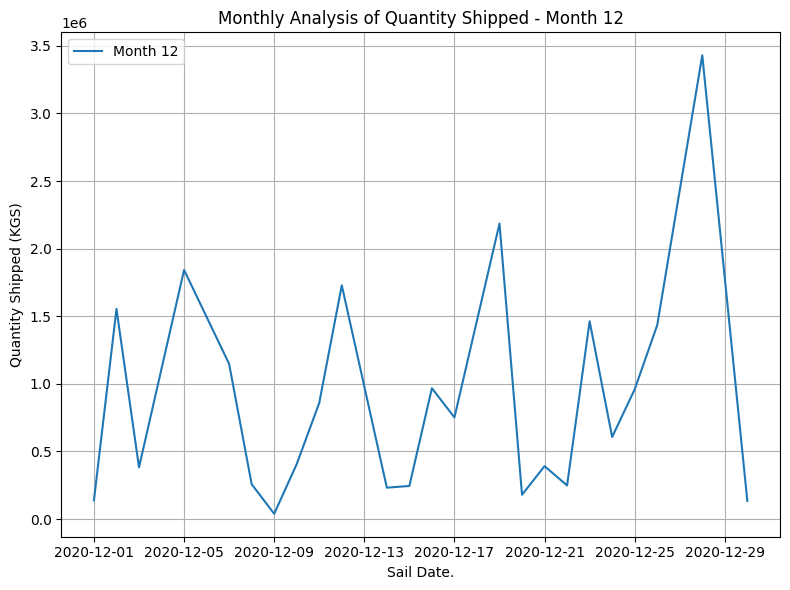

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


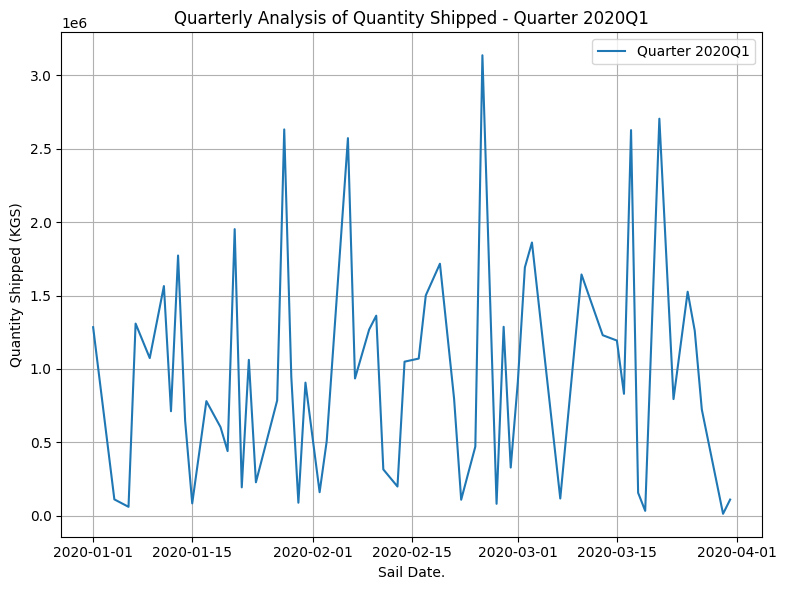

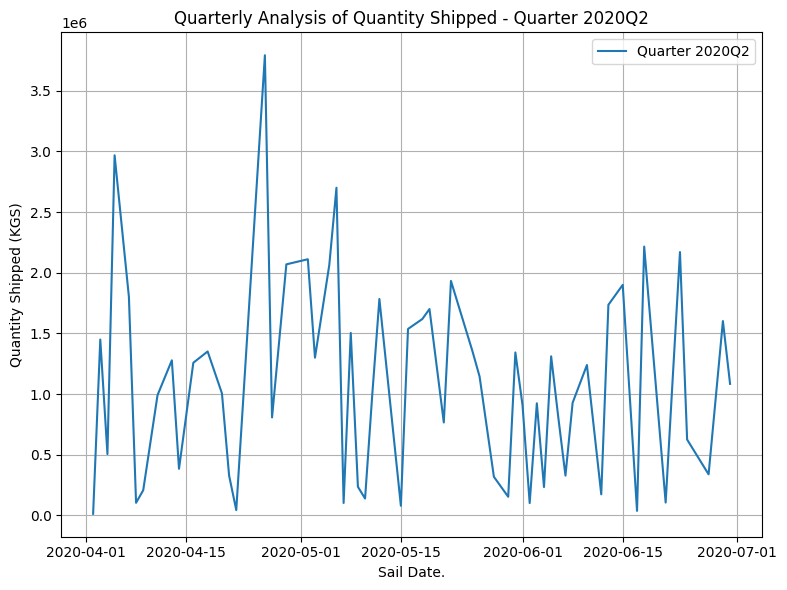

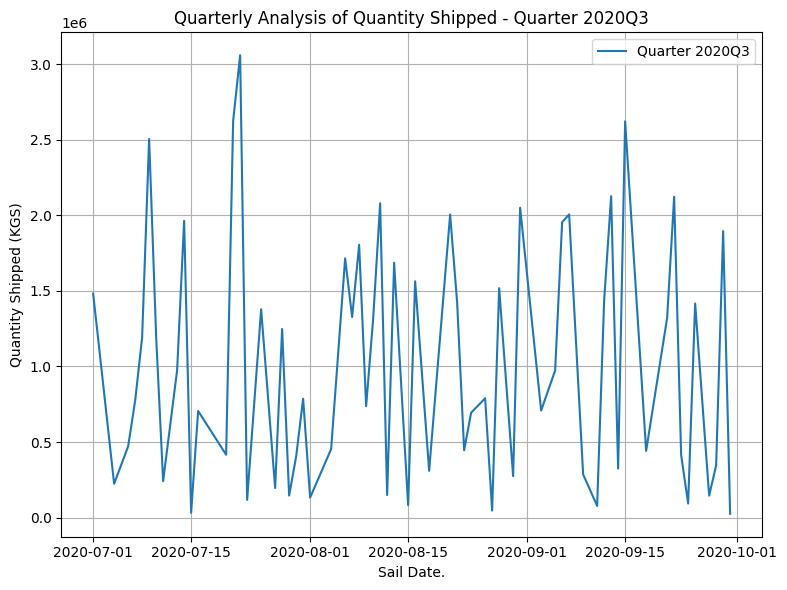

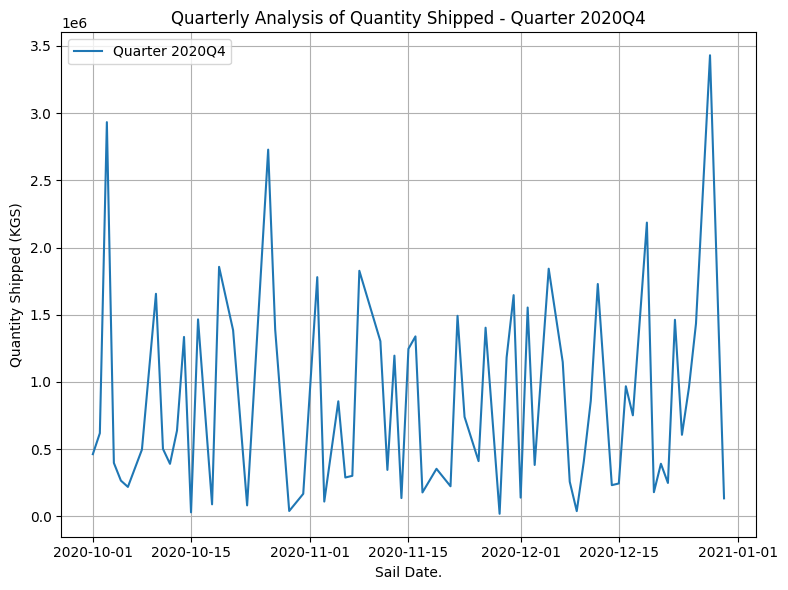

In [17]:


# Assuming daily_sales is your DataFrame containing the sales data
# Replace 'Sail Date.' with the actual name of your date column

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns and pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Group the data by quarters
    daily_sales['Quarter'] = daily_sales['Sail Date.'].dt.to_period('Q')

    # Iterate over each quarter
    for quarter in daily_sales['Quarter'].unique():
        # Filter the data for the current quarter
        quarter_data = daily_sales[daily_sales['Quarter'] == quarter]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Quarter {quarter}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Quarterly Analysis of Quantity Shipped - Quarter {quarter}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


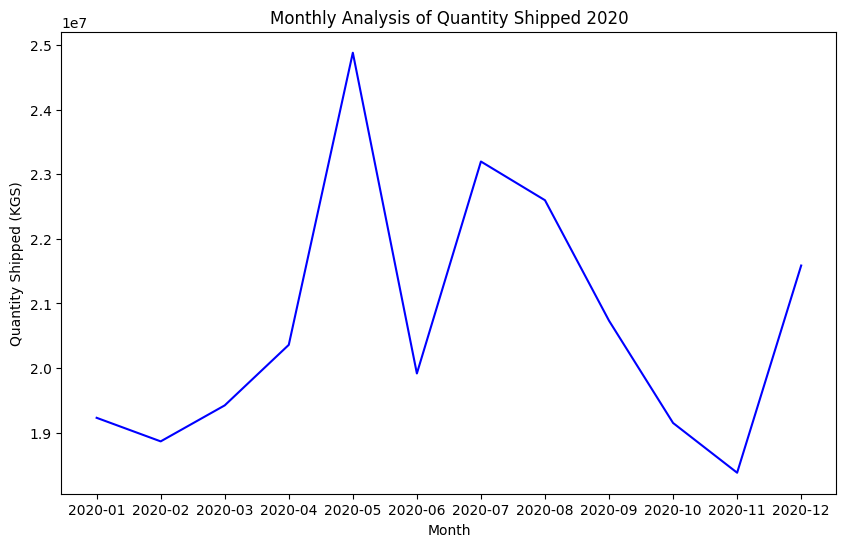

In [18]:
import matplotlib.pyplot as plt

# Assuming daily_sales is your DataFrame containing the sales data

# Check if the 'Sail Date.' column is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.to_period('M')

    # Group the data by month and calculate the total quantity shipped for each month
    monthly_data = daily_sales.groupby('Month')['QTY.(KGS)'].sum()

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plotting each quarter with a different color
    plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='', linestyle='-', color='blue')  # Plot all months in blue
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped 2020')

    # Show the plot
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


<Figure size 1200x800 with 0 Axes>

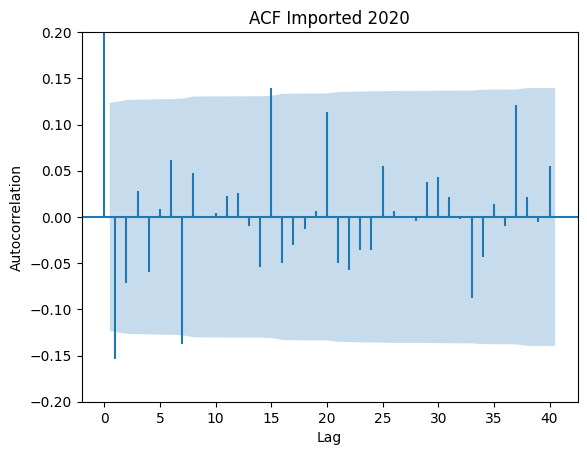

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming daily_sales is your DataFrame containing the sales data

# Specify the column name
sail_date_column = 'Sail Date.'

# Check if the specified column exists in the DataFrame
if sail_date_column in daily_sales.columns:
    # Attempt to convert 'Sail Date.' to datetime
    try:
        daily_sales[sail_date_column] = pd.to_datetime(daily_sales[sail_date_column])
    except ValueError as e:
        # Print the error message and problematic values
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = daily_sales.loc[~daily_sales[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    # Check if the column was successfully converted to datetime
    if pd.api.types.is_datetime64_any_dtype(daily_sales[sail_date_column]):
        # Set 'Sail Date.' column as index
        daily_sales.set_index(sail_date_column, inplace=True)
        
        # Increase figure size
        plt.figure(figsize=(12, 8))

        # Plot the autocorrelation function (ACF)
        plot_acf(daily_sales['QTY.(KGS)'], lags=40, marker=None)  # Adjust lags as needed
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2020')
        
        # Set y-axis limits
        plt.ylim(-0.20, 0.20)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")
